# 預處理

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train), (x_img_test, y_label_test) = cifar10.load_data()

In [3]:
label_dict = {0: 'airplane',
              1: 'automobile',
              2: 'bird',
              3: 'cat',
              4: 'deer',
              5: 'dog',
              6: 'frog',
              7: 'horse',
              8: 'ship',
              9: 'truck',
}

In [4]:
def plot_images_labels_prediction(images, labels, prediction, idx, num):
    fig = plt.gcf()
    fig.set_size_inches(15, 20)
    for i in range(0, num):
        ax = plt.subplot(10, 10, 1 + i)
        ax.imshow(images[idx], cmap = 'binary')
        title = str(i) + ', ' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title = title + '\n' + 'prediction: \n' + label_dict[prediction[i]]
        ax.set_title(title, fontsize = 10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

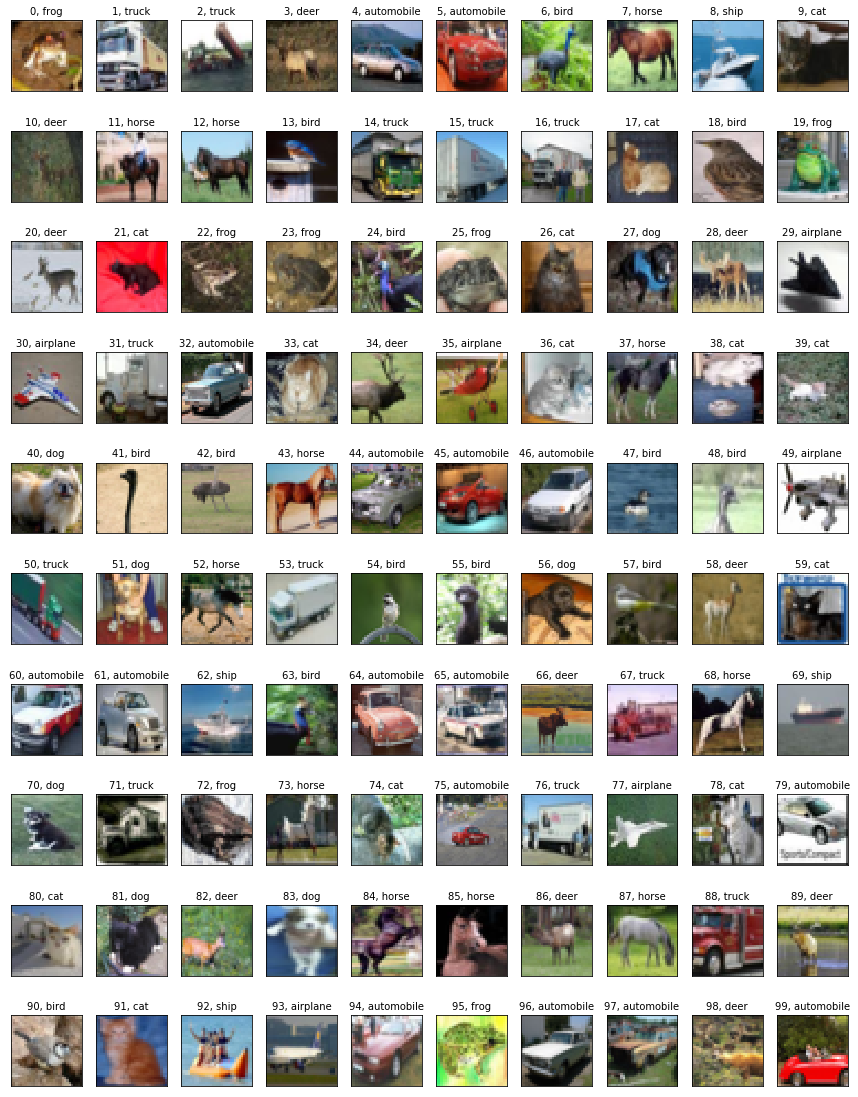

In [5]:
plot_images_labels_prediction(x_img_train, y_label_train, [], 0, 100)

In [6]:
x_img_train_normalize = x_img_train.astype('float') / 255
x_img_test_normalize = x_img_test.astype('float') / 255

In [7]:
print(x_img_train_normalize.shape)
print(x_img_test_normalize.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [8]:
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [9]:
print(y_label_train_OneHot.shape)
print(y_label_test_OneHot.shape)

(50000, 10)
(10000, 10)


# 建模

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [11]:
model = Sequential()

### 卷積層1

In [12]:
model.add(Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    input_shape = (32, 32, 3),
    activation = 'relu',
    padding = 'same'
))

In [13]:
model.add(Dropout(rate = 0.3))

In [14]:
model.add(Conv2D(
    filters = 32,
    kernel_size = (3, 3),
    activation = 'relu',
    padding = 'same'
))

### 池化層1

In [15]:
model.add(MaxPooling2D(pool_size = (2, 2)))

### 卷積層2

In [16]:
model.add(Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    activation = 'relu',
    padding = 'same',
))

In [17]:
model.add(Dropout(rate = 0.3))

In [18]:
model.add(Conv2D(
    filters = 64,
    kernel_size = (3, 3),
    activation = 'relu',
    padding = 'same',
))

### 池化層2

In [19]:
model.add(MaxPooling2D(pool_size = (2, 2)))

### 卷積層3

In [20]:
model.add(Conv2D(
    filters = 128,
    kernel_size = (3, 3),
    activation = 'relu',
    padding = 'same',
))

In [21]:
model.add(Dropout(rate = 0.3))

In [22]:
model.add(Conv2D(
    filters = 128,
    kernel_size = (3, 3),
    activation = 'relu',
    padding = 'same',
))

### 池化層3

In [23]:
model.add(MaxPooling2D(pool_size = (2, 2)))

### 平坦層

In [24]:
model.add(Flatten())

In [25]:
model.add(Dropout(rate = 0.3))

### 隱藏層1

In [26]:
model.add(Dense(2500, activation = 'relu'))

In [27]:
model.add(Dropout(rate = 0.3))

### 隱藏層2

In [28]:
model.add(Dense(1500, activation = 'relu'))

In [29]:
model.add(Dropout(rate = 0.3))

### 輸出層

In [30]:
model.add(Dense(10, activation = 'softmax'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

# 訓練

In [32]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy'],    
)

In [33]:
train_history = model.fit(
    x_img_train_normalize,
    y_label_train_OneHot,
    validation_split = 0.2,
    epochs = 10,
    batch_size = 300,
    verbose = 1,
)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 2280s 57ms/step - loss: 1.9160 - acc: 0.2813 - val_loss: 1.7533 - val_acc: 0.3715
Epoch 2/10
40000/40000 [==============================] - 1711s 43ms/step - loss: 1.5272 - acc: 0.4350 - val_loss: 1.6220 - val_acc: 0.4235
Epoch 3/10
40000/40000 [==============================] - 1400s 35ms/step - loss: 1.3484 - acc: 0.5079 - val_loss: 1.3932 - val_acc: 0.5105
Epoch 4/10
40000/40000 [==============================] - 1711s 43ms/step - loss: 1.1973 - acc: 0.5642 - val_loss: 1.1242 - val_acc: 0.6015
Epoch 5/10
40000/40000 [==============================] - 1286s 32ms/step - loss: 1.0764 - acc: 0.6132 - val_loss: 1.1469 - val_acc: 0.5944
Epoch 6/10
40000/40000 [==============================] - 1512s 38ms/step - loss: 0.9799 - acc: 0.6502 - val_loss: 0.9082 - val_acc: 0.6834
Epoch 7/10
40000/40000 [==============================] - 1449s 36ms/step - loss: 0.8895 - acc: 0.6839 - val_l

In [34]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

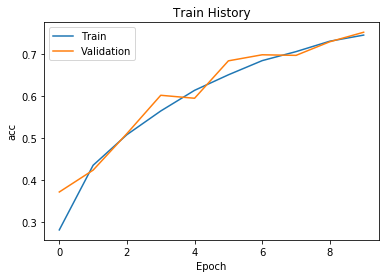

In [35]:
show_train_history(train_history, 'acc', 'val_acc')

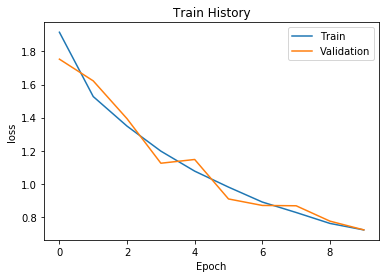

In [36]:
show_train_history(train_history, 'loss', 'val_loss')

In [37]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot, verbose = 0)

In [38]:
scores

[0.7413222299575806, 0.7461]

# 預測

In [39]:
prediction = model.predict_classes(x_img_test_normalize)

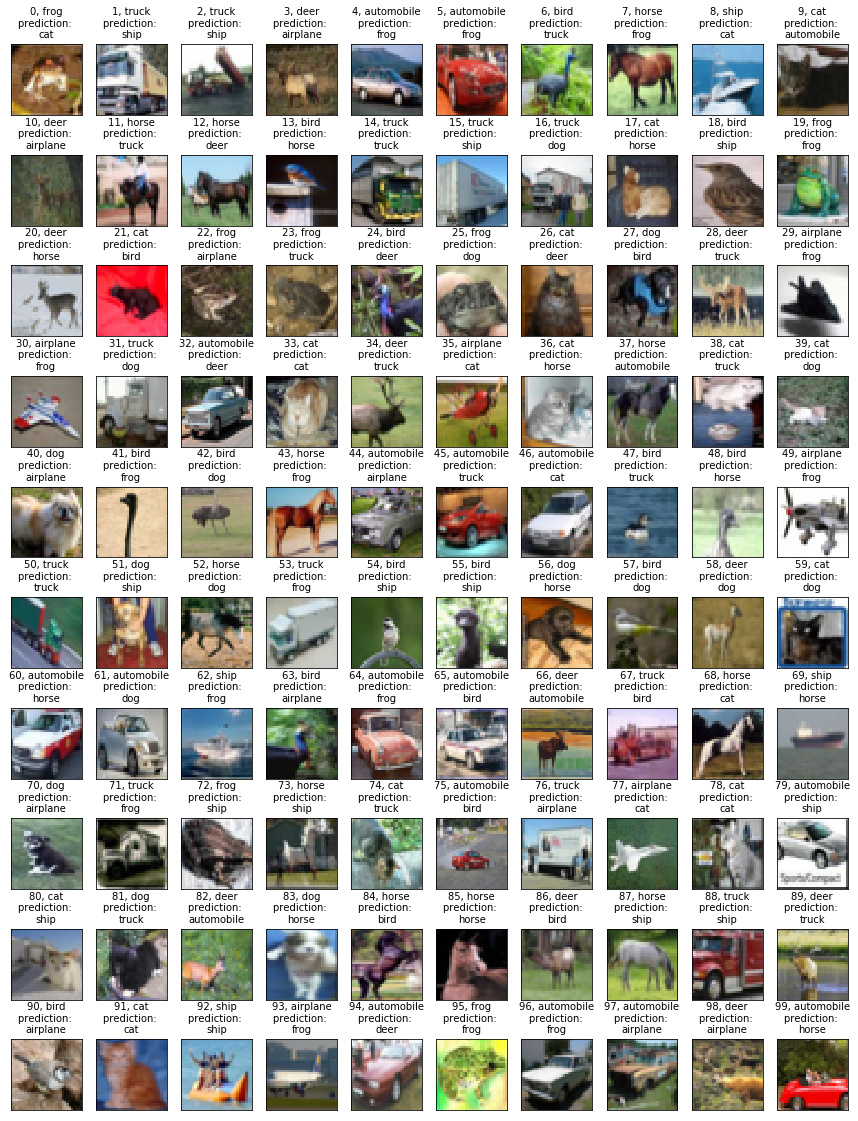

In [40]:
plot_images_labels_prediction(x_img_train, y_label_train, prediction, 0, 100)

In [41]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [45]:
def show_Predict_Probability(y, prediction, x_img, Predicted_Probability, i):
    print('label: ', label_dict[y[i][0]], '\nprediction: ', label_dict[prediction[i]])
    plt.figure(figsize = (2, 2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + ': %1.9f' % (Predicted_Probability[i][j]))

label:  airplane 
prediction:  cat


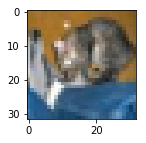

airplane: 0.003184624
automobile: 0.007671944
bird: 0.011119934
cat: 0.465728253
deer: 0.003234179
dog: 0.341871738
frog: 0.081820585
horse: 0.003806216
ship: 0.074199282
truck: 0.007363268


In [46]:
show_Predict_Probability(y_label_test_OneHot, prediction, x_img_test, Predicted_Probability, 0)